# Blatt 5 

Die Aufgabe Nr.11 ist auch im Ordner dieses Dokuments als 'Nummer 11.pdf', da die Aufgabe wie verlangt mit Hand geschrieben wurde. 

### Nr. 12a)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Die Daten werden gelesen mit Pandas und anschließend in ein Array konvertiert.

In [2]:
p0 = pd.read_hdf('zwei_populationen.h5', key="P_0_10000", mode="r")
p1 = pd.read_hdf('zwei_populationen.h5', key="P_1", mode="r")
p0 = p0.values
p1 = p1.values

Die Mittelwerte $\vec{\mu_\text{P0}}$ und $\vec{\mu_\text{P1}}$ werden berechnet.

In [3]:
mup0 = np.mean(p0, axis=0)
mup1 = np.mean(p1, axis=0)

### b)
Die Kovarianzmatrix $V_\text{P0}$ und $V_\text{P1}$ der beiden Populationen, sowie die kombinierte Kovarianzmatrix $V_\text{P0,P1}$ werden berechnet.

In [4]:
covp0 = np.cov(p0.T)
covp1 = np.cov(p1.T)
covp01 = covp0+covp1

### c)
Die Fisher Diskriminante $\vec{\lambda} = \lambda \cdot \vec{e}_{\vec{\lambda}}$ wird konstruiert. 

In [5]:
lambda_min = np.linalg.inv(covp01)@(mup0-mup1)
print(f"Die Geradengleichung ist eine Achse durch den Nullpunkt mit dem Richtungsvektor Lambda= ({lambda_min[0]:.2f}, {lambda_min[1]:.2f}).")

Die Geradengleichung ist eine Achse durch den Nullpunkt mit dem Richtungsvektor Lambda= (-1.26, 1.60).


Die Geradengleichung lautet dann also $\vec{p} = \begin{pmatrix} -1.26 \\ 1.60 \end{pmatrix} \cdot x$ mit $x \in \mathbb{R}$.

### d) 
Die Werte werden auf die Gerade projiziert und anschließend histogrammiert. 

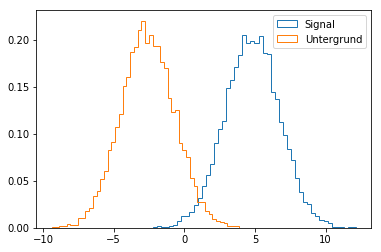

In [6]:
signal = p0@lambda_min
untergrund = p1@lambda_min
plt.hist(signal, bins=50, density=True, label="Signal", histtype="step")
plt.hist(untergrund, bins=50, density=True, label="Untergrund", histtype="step")
plt.legend()
None

### e) 
Die Effizienz und Reinheit werden nach Formeln aus dem Skript in Abhängigkeit vom Parameter $\lambda_{cut}$ in Funktionen umgeschrieben und anschließend geplottet.

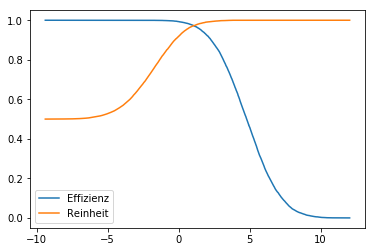

In [7]:
def effizienzSig(lamb, Sig):
    eff = []
    for i in range(len(lamb)):
        eff = np.append(eff, len(Sig[Sig>lamb[i]])/len(Sig)) 
    return eff

def reinheitSig(lamb, Sig, Unt):
    rein = []
    for i in range(len(lamb)):
        rein = np.append(rein, len(Sig[Sig>lamb[i]])/(len(Sig[Sig>lamb[i]])+ len(Unt[Unt>lamb[i]])))
    return rein
                                           
lambda_eff = np.linspace(np.min([np.min(signal), np.min(untergrund)]), np.max([np.max(signal), np.max(untergrund)])-0.1, 10000)
reinp0dim1 = reinheitSig(lambda_eff, signal, untergrund)
effp0dim1 = effizienzSig(lambda_eff, signal)
         
plt.plot(lambda_eff, effp0dim1, label="Effizienz")
plt.plot(lambda_eff, reinp0dim1, label="Reinheit")
plt.legend()
None

### f)

lambda_cut Signifikanz= 0.9467
lambda_cut Schnittpunkt Effizienz und Reinheit= 1.0593


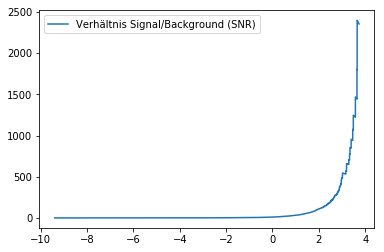

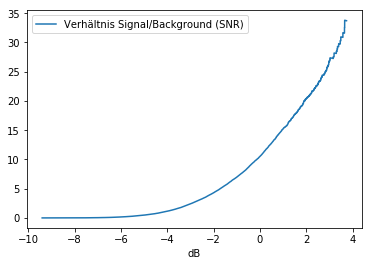

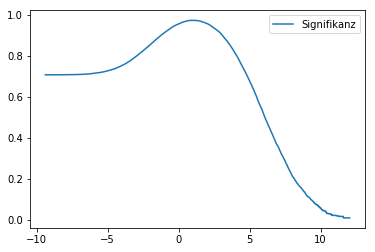

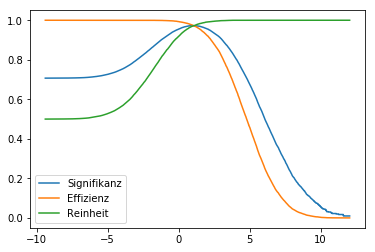

In [8]:
def SigToBack(lamb, Sig, Unt):
    sigtoback = []
    for i in range(len(lamb)):
        sigtoback = np.append(sigtoback, len(Sig[Sig>lamb[i]])/(len(Unt[Unt>lamb[i]])))
    return sigtoback

def Signifikanz(lamb, Sig, Unt):
    sign = []
    for i in range(len(lamb)):
        sign = np.append(sign, len(Sig[Sig>lamb[i]])/np.sqrt((len(Unt[Unt>lamb[i]]))+len(Sig[Sig>lamb[i]])))
    return sign

lambda_SigToUnt = np.linspace(np.min([np.min(signal), np.min(untergrund)]), np.max(np.max(untergrund))-0.1, 10000)
lambda_sign = np.linspace(np.min([np.min(signal), np.min(untergrund)]), np.max([np.max(signal), np.max(untergrund)])-0.1, 10000)
SigToUnt = SigToBack(lambda_SigToUnt, signal, untergrund)
Signif= Signifikanz(lambda_sign, signal, untergrund)

plt.figure(1)
plt.plot(lambda_SigToUnt, SigToUnt, label="Verhältnis Signal/Background (SNR)")
plt.legend()
plt.figure(3)
plt.plot(lambda_SigToUnt, 10*np.log10(SigToUnt), label="Verhältnis Signal/Background (SNR)")
plt.xlabel(r"dB")
plt.legend()
plt.figure(2)
plt.plot(lambda_sign, Signif/100, label="Signifikanz")
plt.legend()
plt.figure(4)
plt.plot(lambda_sign, Signif/100, label="Signifikanz")
plt.plot(lambda_eff, effp0dim1, label="Effizienz")
plt.plot(lambda_eff, reinp0dim1, label="Reinheit")
plt.legend()

print(f"lambda_cut Signifikanz= {lambda_sign[Signif== np.max(Signif)].mean():.4f}")

diffeffrein= np.abs(effp0dim1-reinp0dim1)
print(f"lambda_cut Schnittpunkt Effizienz und Reinheit= {lambda_eff[diffeffrein == np.min(diffeffrein)].mean():.4f}")

None


Das SNR wird nach Trennung für den Wert maximal bei dem $\lambda_{cut}$ an dem Punkt ankommt, an dem kein Wert vom Untergrund mehr im Verhältnis zum Signal steht. Da der Wert des Signal-Noise-Ratio üblicherweise in dB angegeben wird haben wir das Ergebnis auch noch einmal transformiert. 

Die Signifikanz, nach der gegebenen Formel, wird bei dem Schnittpunkt der Effizienz und der Reinheit maximal. Dieser liegt ungefähr bei $\lambda_{cut, max} = 0,9467$. Der tatsächliche Schnittpunkt liegt bei ca. $1,0593$. 


### g)

Alles analog für die kleinere Population.

In [9]:
p2 = pd.read_hdf('zwei_populationen.h5', key="P_0_1000", mode="r")
p3 = pd.read_hdf('zwei_populationen.h5', key="P_1", mode="r")
p2 = p2.values
p3 = p3.values

In [10]:
covp2 = np.cov(p2.T)
covp3 = np.cov(p3.T)
covp02 = covp2 + covp3

In [11]:
mup2 = np.mean(p2, axis=0)
mup3 = np.mean(p3, axis=0)

In [12]:
lambda_min2 = np.linalg.inv(covp02)@(mup2-mup3)
print(f"Die Geradengleichung ist eine Achse durch den Nullpunkt mit dem Richtungsvektor({lambda_min[0]:.2f}, {lambda_min[1]:.2f}).")

Die Geradengleichung ist eine Achse durch den Nullpunkt mit dem Richtungsvektor(-1.26, 1.60).


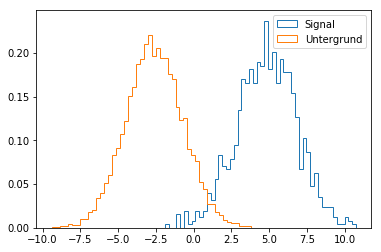

In [13]:
sig = p2@lambda_min
unt = p3@lambda_min
plt.hist(sig, bins=50, density=True, label="Signal", histtype="step")
plt.hist(unt, bins=50, density=True, label="Untergrund", histtype="step")
plt.legend()
None

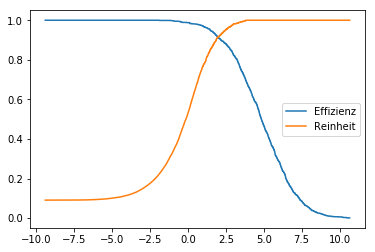

In [14]:
lambda_eff = np.linspace(np.min([np.min(sig), np.min(unt)]), np.max([np.max(sig), np.max(unt)])-0.1, 10000)
reinp2dim1 = reinheitSig(lambda_eff, sig, unt)
effp2dim1 = effizienzSig(lambda_eff, sig)

                                           
plt.plot(lambda_eff, effp2dim1, label="Effizienz")
plt.plot(lambda_eff, reinp2dim1, label="Reinheit")
plt.legend()
None

lambda_cut Signifikanz= 2.3500
lambda_cut Schnittpunkt Effizienz und Reinheit= 1.9848


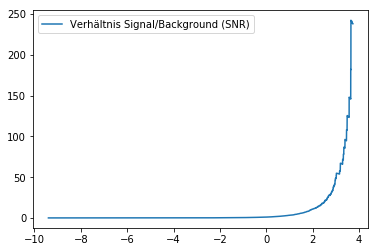

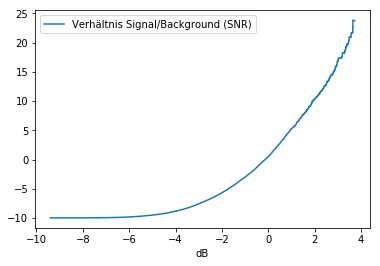

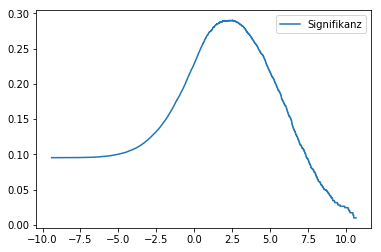

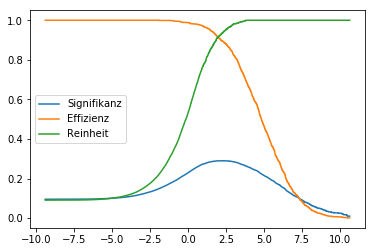

In [15]:
lambda_SigToUnt = np.linspace(np.min([np.min(sig), np.min(unt)]), np.max(np.max(unt))-0.1, 10000)
lambda_sign = np.linspace(np.min([np.min(sig), np.min(unt)]), np.max([np.max(sig), np.max(unt)])-0.1, 10000)
SigToUnt = SigToBack(lambda_SigToUnt, sig, unt)
Signif= Signifikanz(lambda_sign, sig, unt)


plt.figure(1)
plt.plot(lambda_SigToUnt, SigToUnt, label="Verhältnis Signal/Background (SNR)")
plt.legend()
plt.figure(3)
plt.plot(lambda_SigToUnt, 10*np.log10(SigToUnt), label="Verhältnis Signal/Background (SNR)")
plt.xlabel(r"dB")
plt.legend()
plt.figure(2)
plt.plot(lambda_sign, Signif/100, label="Signifikanz")
plt.legend()
plt.figure(4)
plt.plot(lambda_sign, Signif/100, label="Signifikanz")
plt.plot(lambda_eff, effp2dim1, label="Effizienz")
plt.plot(lambda_eff, reinp2dim1, label="Reinheit")
plt.legend()

print(f"lambda_cut Signifikanz= {lambda_sign[Signif== np.max(Signif)].mean():.4f}")

diffeffrein= np.abs(effp2dim1-reinp2dim1)
print(f"lambda_cut Schnittpunkt Effizienz und Reinheit= {lambda_eff[diffeffrein == np.min(diffeffrein)].mean():.4f}")

None


Das SNR wird nach Trennung für den Wert maximal bei dem $\lambda_{cut}$ an dem Punkt ankommt, an dem kein Wert vom Untergrund mehr im Verhältnis zum Signal steht. Da der Wert des Signal-Noise-Ratio üblicherweise in dB angegeben wird haben wir das Ergebnis auch noch einmal transformiert. 

Die Signifikanz, nach der gegebenen Formel, wird ein wenig rechts vom Schnittpunkt der Effizienz und der Reinheit maximal. Dieser liegt ungefähr bei $\lambda_{cut, max} = 2,35$. Der tatsächliche Schnittpunkt liegt bei ca. $1,98$. 

Der Unterschied zu a) bis f) ist, dass die Signifikanz hierbei deutlich geringer ist, als bei der Auswertung, was aber Sinn ergibt, wenn die Signifikanz die Signifikanz einer Messung angibt, denn dann ist diese bei deutlich weniger Signal Werten auch deutlich geringer.

# 13  a)

Es wird ein Datensatz erstellt und anschließend geplottet. Dafür wird das `sklearn` Package genutzt. 

In [16]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import PCA

In [17]:
X, labels_true = make_blobs(n_samples=1000, centers = 2, n_features=4, random_state=0)

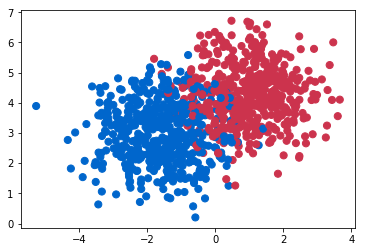

In [18]:
discrete_cmap = ListedColormap([(0.8, 0.2, 0.3), (0.1, 0.8, 0.3), (0, 0.4, 0.8)])
plt.scatter(X[:,0], X[:,1], c=labels_true, s=50, cmap=discrete_cmap)
#plt.scatter(X[:,2], X[:,3], c=labels_true, s=50, cmap=discrete_cmap)
None

# b) 

### Beschreibung der Funktionsweise

Mathematisch wird bei der Hauptkomponentenanalyse nach einer neuen Basis im Raum gesucht, indem die Varianz entlang der Basisvektoren maximiert wird.

Es sind also $N$  Datenpunkte mit $d$  Merkmalen oder Eigenschaften gegeben, die auf  $k \, < \, d$  Eigenschaften projiziert werden sollen. Dabei versucht man so wenig Information wie möglich zu verlieren und Redundanzen in Form von Korrelationen zusammenzufassen. 

* Daten auf Mittelwert zentrieren,
* Kovarianzmatrix aus der Datenmatrix  $\mathbf{X}$ berechnen,
* Eigenwerte und Eigenvektoren der Kovarianzmatrix berechnen,
* $k$ größte Eigenwerte und zugehörige Eigenvektoren auswählen,
* eine  $d \times k$  Matrix  $\mathbf{W}$  mit $k$ Eigenvektoren als Spalten bilden und
* $\mathbf{W}$ auf jede Zeile $x$ aus $\mathbf{X}$ anwenden, $ x′=\mathbf{W}^T \cdot x^T$. 


### c) 
Anwenden der PCA auf den Datensatz aus a). Die Eigenwerte der Kovarianzmatrix wurden im Folgenden ausgegeben. 
Ein Eigenwert ist sehr groß. Der Rest ist ziemlich ähnlich. Dies bedeutet, dass die Information des zweiten, dritten und vierten Eigenvektors redundant sind und verworfen werden können. Dies sieht man auch an den gleich aussehenden Histogrammen im nächsten Aufgabenteil.


In [19]:
pca = PCA(n_components=4)
transformed = pca.fit_transform(X)
covX = pca.get_covariance()
l, W = np.linalg.eigh(covX)
l = l[::-1]
W = W[:, ::-1]
for i in range(len(l)):
    print(f"Eigenwert {i+1}: {l[i]:.2f}")

Eigenwert 1: 17.52
Eigenwert 2: 1.00
Eigenwert 3: 0.99
Eigenwert 4: 0.90


### d) 
Die neuen $x'$ Daten werden histogrammiert in allen Dimensionen und die ersten beiden davon werden in einem Scatterplot dargestellt.

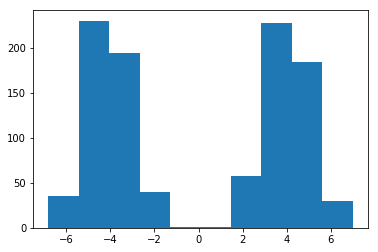

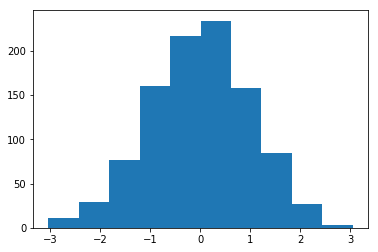

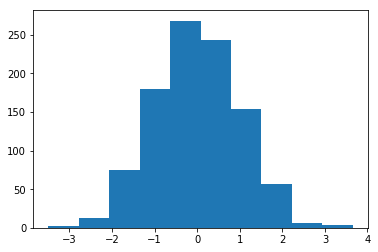

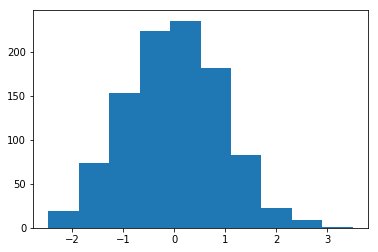

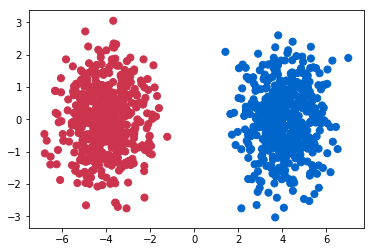

In [20]:
plt.figure(10)
plt.hist(transformed[:,0])
plt.figure(11)
plt.hist(transformed[:,1])
plt.figure(12)
plt.hist(transformed[:,2])
plt.figure(13)
plt.hist(transformed[:,3])
plt.figure(14)
plt.scatter(transformed[:, 0], transformed[:,1], c=labels_true, s=50, cmap=discrete_cmap)
#plt.scatter(transformed[:, 2], transformed[:,3], c=labels_true, s=50, cmap=discrete_cmap)
None